## Jacksonville, FL 2023 City Council and Mayoral Election Results and Boundaries

### Sections
- <a href="#join">Read in Input Files and Join</a><br>
- <a href="#maup">Join with Election Returns</a><br>
- <a href="#exp">Export Cleaned Datasets</a><br>

#### Sources

- [Duval County Supervisor of Elections - Jacksonville FL 2023 Municipal Election Returns](https://enr.electionsfl.org/DUV/3385/Summary/).
- [Jacksonville GIS - City Council Districts GeoJSON](https://maps.coj.net/CouncilDistrictSearch/)
- [RDH 2022 General Election Results and Boundaries](https://redistrictingdatahub.org/dataset/florida-2022-general-election-precinct-level-results-and-boundaries/)

In [1]:
import pandas as pd
import geopandas as gp
import os
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

<p><a name="join"></a></p>

### Read in input files

Election returns were transcribed from Louisiana SOS website to machine readable format, and checked for accuracy.

In [2]:
#Election Returns
er_raw = pd.read_csv("./raw-from-source/FL23_JACKSONVILLE_ER_PROC.csv").fillna(0)
er_raw

,UNIQUE_ID,MNCIPAL,PRECINCT,G23MYRRDAV,G23MYRDDEE,GCTCADGAR,GCTCARMIL,GCTC2RBRO,GCTC2RGAY,GCTC7RHOG,GCTC7DPEL,GCTC8DGAF,GCTC8DHOL,GCTC9DCLA,GCTC9RMUL,GCTC11RARI,GCTC11DDAY,GCTC14RDRA,GCTC14DJOH
0,0.0,JACKSONVILLE,1001,80,1001,977,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,JACKSONVILLE,1002,33,922,904,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,JACKSONVILLE,1003,22,468,450,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,JACKSONVILLE,1004,19,877,850,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,JACKSONVILLE,1005,33,1219,1181,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,JACKSONVILLE,1006,197,216,202,208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,JACKSONVILLE,1007,102,233,223,107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,JACKSONVILLE,1008,17,540,522,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,JACKSONVILLE,1009,29,926,906,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,JACKSONVILLE,101,378,439,409,403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Add in UNIQUE_ID Column
er_raw['UNIQUE_ID'] = er_raw['MNCIPAL'].astype(str) + '-:-' + er_raw['PRECINCT'].astype(str)

In [4]:
er_raw.head()

,UNIQUE_ID,MNCIPAL,PRECINCT,G23MYRRDAV,G23MYRDDEE,GCTCADGAR,GCTCARMIL,GCTC2RBRO,GCTC2RGAY,GCTC7RHOG,GCTC7DPEL,GCTC8DGAF,GCTC8DHOL,GCTC9DCLA,GCTC9RMUL,GCTC11RARI,GCTC11DDAY,GCTC14RDRA,GCTC14DJOH
0,JACKSONVILLE-:-1001,JACKSONVILLE,1001,80,1001,977,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,JACKSONVILLE-:-1002,JACKSONVILLE,1002,33,922,904,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,JACKSONVILLE-:-1003,JACKSONVILLE,1003,22,468,450,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,JACKSONVILLE-:-1004,JACKSONVILLE,1004,19,877,850,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,JACKSONVILLE-:-1005,JACKSONVILLE,1005,33,1219,1181,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## City Council District Shapes File

In [5]:
district_path = './raw-from-source/jacksonville_council_districts.geojson'
jacksonville_dist = gp.read_file(district_path)

In [6]:
## Add in unique_id column
jacksonville_dist['DISTRICT_N'] = jacksonville_dist['DISTRICT_N'].astype(str)
jacksonville_dist['UNIQUE_ID'] = 'JACKSONVILLE_CITYCOUNCIL_' + jacksonville_dist['DISTRICT_N']
#subset
jacksonville_dist = jacksonville_dist[['UNIQUE_ID', 'geometry']]

In [7]:
jacksonville_dist.head()

,UNIQUE_ID,geometry
0,JACKSONVILLE_CITYCOUNCIL_1,"POLYGON ((-81.58099 30.38993, -81.58554 30.394..."
1,JACKSONVILLE_CITYCOUNCIL_2,"POLYGON ((-81.60814 30.55364, -81.60862 30.553..."
2,JACKSONVILLE_CITYCOUNCIL_3,"POLYGON ((-81.45931 30.37945, -81.45971 30.381..."
3,JACKSONVILLE_CITYCOUNCIL_4,"POLYGON ((-81.52393 30.31297, -81.52404 30.313..."
4,JACKSONVILLE_CITYCOUNCIL_5,"POLYGON ((-81.63333 30.31534, -81.63682 30.316..."


<AxesSubplot:>

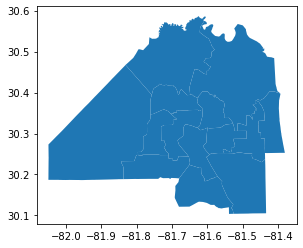

In [8]:
jacksonville_dist.plot()

## Precinct boundaries Shapefile
Read in 2023 Unitary Election precinct boundaries shapefile received via email from the City of Jacksonville.

In [9]:
duval23 = gp.read_file('./raw-from-source/Precinct SHAPE/Precinct SHAPE/PRECINCT12031.shp')

In [10]:
duval23['PRECINCT'] = duval23['PRECINCT'].astype(int)
len(duval23)

186

In [11]:
#Check
er_precs = er_raw.PRECINCT.unique()
duval_precs = duval23.PRECINCT.unique()
print(len(duval_precs) == len(er_precs))
set(er_precs) == set(duval_precs)

True


True

<AxesSubplot:>

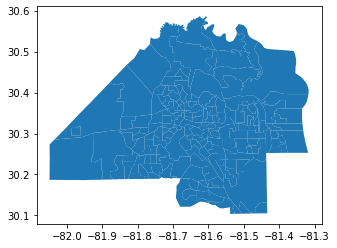

In [12]:
duval23.plot()

### Merge with Election Returns

In [13]:
# merge
jacksonville_pber = er_raw.merge(duval23, on='PRECINCT', how = 'right', indicator=True)

In [14]:
#check indicator to see if merge was successful
jacksonville_pber._merge.value_counts()

both          186
left_only       0
right_only      0
Name: _merge, dtype: int64

In [15]:
#Drop merge column, drop district column
jacksonville_pber.drop(labels = ['_merge'], axis = 1, inplace = True)

In [16]:
jacksonville_pber.head()

,UNIQUE_ID,MNCIPAL,PRECINCT,G23MYRRDAV,G23MYRDDEE,GCTCADGAR,GCTCARMIL,GCTC2RBRO,GCTC2RGAY,GCTC7RHOG,GCTC7DPEL,GCTC8DGAF,GCTC8DHOL,GCTC9DCLA,GCTC9RMUL,GCTC11RARI,GCTC11DDAY,GCTC14RDRA,GCTC14DJOH,geometry
0,JACKSONVILLE-:-1001,JACKSONVILLE,1001,80,1001,977,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-81.72017 30.41469, -81.72088 30.414..."
1,JACKSONVILLE-:-1002,JACKSONVILLE,1002,33,922,904,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-81.69907 30.38242, -81.69909 30.382..."
2,JACKSONVILLE-:-1003,JACKSONVILLE,1003,22,468,450,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-81.69723 30.36217, -81.69736 30.362..."
3,JACKSONVILLE-:-1004,JACKSONVILLE,1004,19,877,850,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-81.71991 30.38732, -81.71997 30.386..."
4,JACKSONVILLE-:-1005,JACKSONVILLE,1005,33,1219,1181,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-81.69716 30.40035, -81.69729 30.400..."


In [17]:
#Geodf
jacksonville_pber = gp.GeoDataFrame(jacksonville_pber, geometry='geometry')
#check
type(jacksonville_pber)

geopandas.geodataframe.GeoDataFrame

<p><a name="exp"></a></p>

### Export Cleaned Datasets

In [18]:
if not os.path.exists("./FL23_JACKSONVILLE_PBER/FL23_JACKSONVILLE_PBER"):
    os.mkdir("./FL23_JACKSONVILLE_PBER/FL23_JACKSONVILLE_PBER")

jacksonville_dist.to_file("./FL23_JACKSONVILLE_PBER/FL23_JACKSONVILLE_PBER/FL23_JACKSONVILLE_DIST.shp")    
jacksonville_pber.to_file("./FL23_JACKSONVILLE_PBER/FL23_JACKSONVILLE_PBER/FL23_JACKSONVILLE_PBER.shp")

In [19]:
def check_file(path):
    if ".csv" in path:
        file_type = ".csv"
        load = pd.read_csv(path)
    elif ".shp" in path:
        file_type = ".shp"
        load = gp.read_file(path)
        assert(os.path.exists(path[0:-4] + ".cpg"))
        assert(os.path.exists(path[0:-4] + ".dbf"))
        assert(os.path.exists(path[0:-4] + ".prj"))
        assert(os.path.exists(path[0:-4] + ".shx"))
    else:
        raise ValueError ("Other function needed to load non .csv or .shp")
    run_checks(load, path, file_type)
    
def run_checks(file, path, file_type):
    if "/Users" in path:
        path = path.replace("/Users","")
    path_name = path.replace("/","-")
    
        
    with open("./FILE_CHECK" + path_name + ".txt","w") as t:
        t.write("***RDH FILE CHECKER***\n")
        t.write("Checking file located at " + path+"\n")
        t.write("\n")
        t.write("\n")        
        
        t.write("***N/A VALUES***\n")
        if(file.isna().any().sum() != 0):
            t.write("N/A values in the following columns\n")
            for col in file.columns:
                num_nas = file[col].isna().sum()
                string_nans = file[file[col]=="nan"].shape[0]
                if file[col].isna().any().sum():
                    t.write("\t"+col+" - "+ str(num_nas) +" row(s)\n")
                elif  string_nans > 0:
                    t.write("\t"+col+" - "+ str(string_nans) +" row(s)\n")

        else:
            t.write("Do not appear to be N/A values")
        t.write("\n")
        t.write("\n")
        
        t.write("***File Size***\n")
        t.write("File contains " + str(file.shape[0]) + " row(s)\n")
        t.write("File contains " + str(file.shape[1]) + " column(s)\n")
        t.write("\n")
        t.write("\n")
        
        if file_type == ".shp":
            t.write("***Invalid Geometries***\n")
            t.write("File contains " + str(file[~file["geometry"].is_valid].shape[0]) + " invalid GEOM row(s)\n")
            t.write("File contains " + str(file[file["geometry"].is_valid].shape[0]) + " valid GEOM row(s)\n")
            t.write("\n")
            t.write("\n")

        t.write("***COLUMN NAMES***\n")
        t.write(str(list(file.columns)))
        t.write("\n")
        t.write("\n")
        
        t.write("***COLUMN NAME LENGTHS***\n")
        long_col_name_list = [i for i in file.columns if len(i) > 10]
        if len(long_col_name_list) > 0:
            t.write("The following columns are longer than 10 characters:" + str(long_col_name_list)+"\n")
        else:
            t.write("No column names are longer than 10 characters\n")
        t.write("\n")
        t.write("\n")

        t.write("***FULL FILE SUMMARY***\n")
        t.write(str(file.describe())+"\n")
        t.write("\n")
        t.write("\n")

        t.write("***MAX VALUE FOR EVERY DATA COLUMN***\n")
        t.write(str(file.max()) + "\n")
        t.write("\n")
        t.write("\n")

        t.write("***MIN VALUE FOR EVERY DATA COLUMN***\n")
        t.write(str(file.min()) + "\n")
        t.write("\n")
        
        t.write("***NUMERIC COLUMN SUMS***\n")
        t.write(str(file.sum(numeric_only=True))+"\n")
        t.write("\n")
        t.write("\n")

        t.write("***COLUMNS AND DUPLICATE VALUES***\n")
        for col in list(file.columns):
            if col != "geometry":
                if max(file[col].value_counts(dropna = False))==1:
                    t.write("NO: Column " + col + " DOES NOT HAVE duplicate values\n")
                elif max(file[col].value_counts(dropna = False))>1:
                    t.write("YES: Column " + col+ " HAS duplicate values\n")
        t.write("\n")


In [20]:
check_file("./FL23_JACKSONVILLE_PBER/FL23_JACKSONVILLE_PBER/FL23_JACKSONVILLE_DIST.shp")
check_file("./FL23_JACKSONVILLE_PBER/FL23_JACKSONVILLE_PBER/FL23_JACKSONVILLE_PBER.shp")